In [9]:
# Import necessary libraries
import ipaddress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [3]:
# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded {df.shape[0]} transactions with {df.shape[1]} features")
    return df
df = load_data('output.csv')
df.head
df.dropna()

Loaded 2512 transactions with 16 features


<bound method NDFrame.head of      TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit       

In [5]:
# Process Data
def preprocess_data(df):
    processed_df = df.copy()
    
    processed_df['TransactionDate'] = pd.to_datetime(processed_df['TransactionDate'])
    processed_df['PreviousTransactionDate'] = pd.to_datetime(processed_df['PreviousTransactionDate'])
    
    processed_df['TimeSincePrevTx'] = (processed_df['TransactionDate'] - processed_df['PreviousTransactionDate']).dt.total_seconds() / 3600
    
    processed_df['TransactionHour'] = processed_df['TransactionDate'].dt.hour
    processed_df['TransactionDay'] = processed_df['TransactionDate'].dt.day_name()
    processed_df['IsWeekend'] = processed_df['TransactionDate'].dt.dayofweek >= 5
    
    processed_df['IPClass'] = processed_df['IP Address'].apply(lambda x: ipaddress.ip_address(x).version)
    
    return processed_df

df_processed = preprocess_data(df)
df_processed.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeSincePrevTx,TransactionHour,TransactionDay,IsWeekend,IPClass
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,-13743.648333,16,Tuesday,False,4
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,-11895.421111,16,Tuesday,False,4
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:04,-11581.848889,18,Monday,False,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:06,-13167.615278,16,Friday,False,4
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:39,-9230.254167,17,Monday,False,4


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeSincePrevTx,TransactionHour,TransactionDay,IsWeekend,IPClass
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,-13743.648333,16,Tuesday,False,4
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,-11895.421111,16,Tuesday,False,4
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:04,-11581.848889,18,Monday,False,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:06,-13167.615278,16,Friday,False,4
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:39,-9230.254167,17,Monday,False,4


In [6]:
# FEATURE ENGINEERING
def engineer_features(df):
    featured_df = df.copy()
    
    account_stats = featured_df.groupby('AccountID').agg({
        'TransactionAmount': ['mean', 'std', 'max'],
        'TransactionDuration': ['mean', 'std'],
        'LoginAttempts': ['mean', 'max']
    })
    
    account_stats.columns = ['_'.join(col).strip() for col in account_stats.columns.values]
    account_stats = account_stats.reset_index()
    
    featured_df = pd.merge(featured_df, account_stats, on='AccountID', how='left')
    
    featured_df['AmountToAvgRatio'] = featured_df['TransactionAmount'] / featured_df['TransactionAmount_mean']
    
  
    location_mode = featured_df.groupby('AccountID')['Location'].apply(
        lambda x: x.mode()[0] if not x.mode().empty else None
    ).reset_index()
    location_mode.columns = ['AccountID', 'UsualLocation']
    
    featured_df = pd.merge(featured_df, location_mode, on='AccountID', how='left')
    featured_df['UnusualLocation'] = featured_df['Location'] != featured_df['UsualLocation']
    
    return featured_df

df_featured = engineer_features(df_processed)
df_featured.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionAmount_mean,TransactionAmount_std,TransactionAmount_max,TransactionDuration_mean,TransactionDuration_std,LoginAttempts_mean,LoginAttempts_max,AmountToAvgRatio,UsualLocation,UnusualLocation
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,460.698571,487.969555,1397.59,138.428571,73.461684,1.000,1,0.030584,Austin,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,304.622857,240.297881,787.41,128.857143,59.159188,1.000,1,1.235101,Baltimore,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,237.047500,197.693348,489.31,71.250000,43.645351,1.000,1,0.532762,Louisville,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,236.483750,275.157989,890.24,100.500000,61.836189,1.375,4,0.780180,Charlotte,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,280.796667,310.729033,826.23,119.000000,74.659226,1.000,1,0.047899,Atlanta,False


In [7]:
# FRAUD SCORING
def rule_based_anomaly_score(transaction):
    score = 0
    
    # Unusual amount rule
    account_avg = transaction['TransactionAmount_mean'] if 'TransactionAmount_mean' in transaction else 0
    account_std = transaction['TransactionAmount_std'] if 'TransactionAmount_std' in transaction else 0
    amount = transaction['TransactionAmount']
    
    # Transaction amount significantly higher than account average
    if account_avg > 0 and amount > account_avg + (3 * account_std or account_avg * 2):
        score += 0.25
    
    
    # Unusual transaction hour
    hour = transaction['TransactionHour'] if 'TransactionHour' in transaction else -1
    if hour >= 23 or hour <= 4:
        score += 0.15
    
    #  Unusually quick transaction
    avg_duration = transaction['TransactionDuration_mean'] if 'TransactionDuration_mean' in transaction else 0
    duration = transaction['TransactionDuration']
    if avg_duration > 0 and duration < avg_duration * 0.3:
        score += 0.1
    
    # Unusual location for this account
    if transaction.get('UnusualLocation', False):
        score += 0.2
    
   
    # Multiple login attempts
    if transaction['LoginAttempts'] > 1:
        score += 0.1 * transaction['LoginAttempts']  
    
    # Transaction amount unusual for age/occupation
    if transaction['CustomerOccupation'] == 'Student' and amount > 1000:
        score += 0.15
    
    return min(score, 1.0)

# Apply rules to the dataset
df_featured['FraudScore'] = df_featured.apply(rule_based_anomaly_score, axis=1)

print("Fraud Score Summary:")
print(df_featured['FraudScore'].describe())

threshold = 0.5
df_featured['IsFraudFlag'] = (df_featured['FraudScore'] > threshold).astype(int)

# Display fraud detection results
print(f"\nFlagged {df_featured['IsFraudFlag'].sum()} transactions as potentially fraudulent")
df_featured[['TransactionID', 'FraudScore', 'IsFraudFlag']].head(10)

Fraud Score Summary:
count    2512.000000
mean        0.177946
std         0.124135
min         0.000000
25%         0.200000
50%         0.200000
75%         0.200000
max         0.800000
Name: FraudScore, dtype: float64

Flagged 55 transactions as potentially fraudulent


,TransactionID,FraudScore,IsFraudFlag
0,TX000001,0.2,0
1,TX000002,0.2,0
2,TX000003,0.2,0
3,TX000004,0.3,0
4,TX000005,0.0,0
5,TX000006,0.2,0
6,TX000007,0.0,0
7,TX000008,0.2,0
8,TX000009,0.0,0
9,TX000010,0.2,0


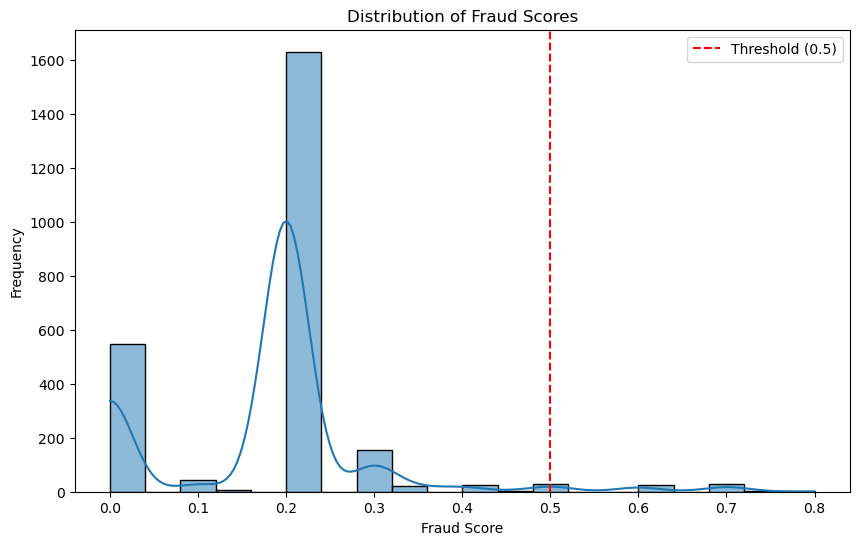

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_featured['FraudScore'], bins=20, kde=True)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Fraud Scores')
plt.xlabel('Fraud Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()